In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from AC_modules.ActorCritic import SupervisedActorCritic
from Utils import train_agent_sandbox as train
from Utils import test_env, utils, plot
from importlib import reload

In [2]:
# Variable parameters
X = 5
Y = 5
initial = [0,0]
goal = [4,4]
MAX_STEPS = 100

game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=True, return_ohe=True)

In [3]:
action_space = 4
n_features = 32
AC_HPs = dict(tau=0.3, n_steps=5)
HPs = dict(state_resolution=X+2, in_channels=3, n_possible_rewards=2, action_features=32, **AC_HPs)
lr = dict(supervised_lr=5e-4, RL_lr=5e-4)

if torch.cuda.is_available():
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])

agent = SupervisedActorCritic(action_space, n_features, **HPs)

Using device cpu


In [4]:
# see if everything works before starting the real training cycle
env = test_env.Sandbox(**game_params)
rewards, log_probs, distributions, states, done, bootstrap, actions = train.play_episode(agent, env, max_steps=MAX_STEPS)

In [5]:
print("rewards: ", rewards.shape)
print("log_probs: ", len(log_probs))
print("distributions: ", len(distributions))
print("states: ", states.shape)
print("done: ", done.shape)
print("bootstrap: ", bootstrap.shape)
print("actions: ", actions.shape)

rewards:  (21,)
log_probs:  21
distributions:  21
states:  (22, 3, 7, 7)
done:  (21,)
bootstrap:  (21,)
actions:  (21,)


In [6]:
supervised_optimizer = torch.optim.Adam(agent.AC.supervised_params(), lr=lr['supervised_lr'])
state_loss, reward_loss = train.supervised_update(agent, supervised_optimizer, rewards, actions, states)
print("state_loss: ", state_loss)
print("reward_loss: ", reward_loss)

state_loss:  0.17982922494411469
reward_loss:  0.5697693228721619


In [ ]:
%%time
results = train.train_sandbox(agent, game_params, n_episodes = 5000,
                              max_steps=MAX_STEPS, return_agent=True, random_init=True, **lr)

Episode 10 - reward: 0.40 - steps to solve: 74.00
Episode 20 - reward: 0.70 - steps to solve: 52.70
Episode 30 - reward: 0.80 - steps to solve: 41.60
Episode 40 - reward: 0.50 - steps to solve: 60.50
Episode 50 - reward: 0.70 - steps to solve: 56.20
Episode 60 - reward: 0.80 - steps to solve: 49.10
Episode 70 - reward: 0.50 - steps to solve: 64.30
Episode 80 - reward: 0.70 - steps to solve: 45.70
Episode 90 - reward: 0.70 - steps to solve: 51.30
Episode 100 - reward: 0.80 - steps to solve: 52.30
Episode 110 - reward: 0.80 - steps to solve: 40.60
Episode 120 - reward: 0.70 - steps to solve: 57.50
Episode 130 - reward: 0.80 - steps to solve: 45.90
Episode 140 - reward: 0.70 - steps to solve: 57.70
Episode 150 - reward: 0.80 - steps to solve: 40.70
Episode 160 - reward: 0.60 - steps to solve: 46.80
Episode 170 - reward: 0.70 - steps to solve: 54.60
Episode 180 - reward: 0.40 - steps to solve: 69.00
Episode 190 - reward: 0.70 - steps to solve: 51.50
Episode 200 - reward: 0.60 - steps to so

In [10]:
reload(plot)

<module 'Utils.plot' from '/home/nicola/Nicola_unipd/MasterThesis/SideProjectsRL/Utils/plot.py'>

Average time for playing one episode: 0.18 s
Average time for updating the agent: 0.08 s
Asymptotic score: 0.562 +/- 0.496


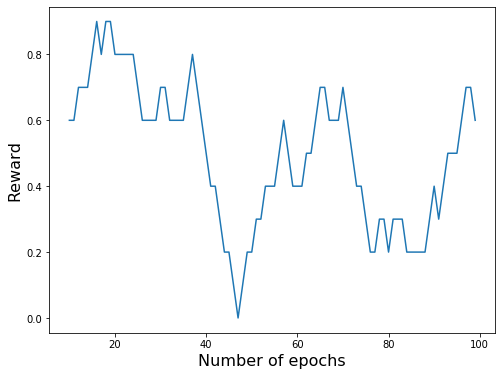

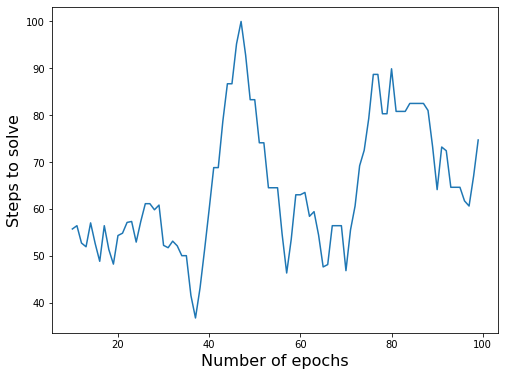

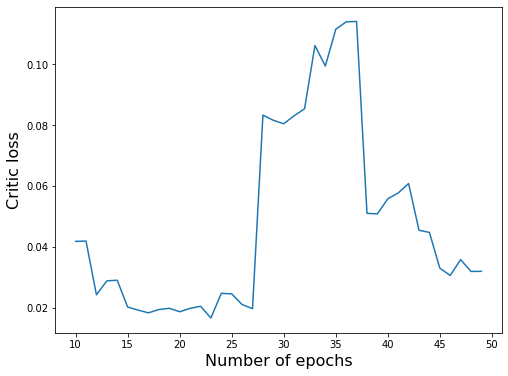

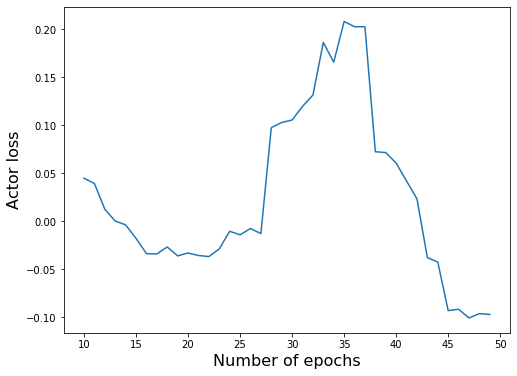

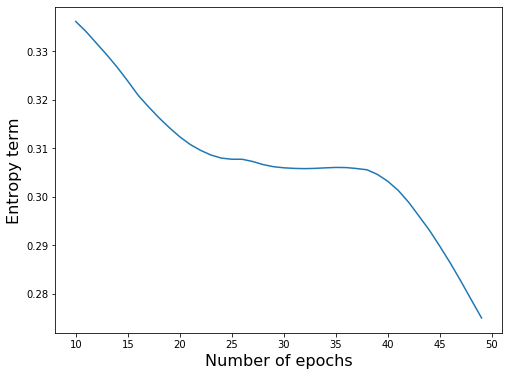

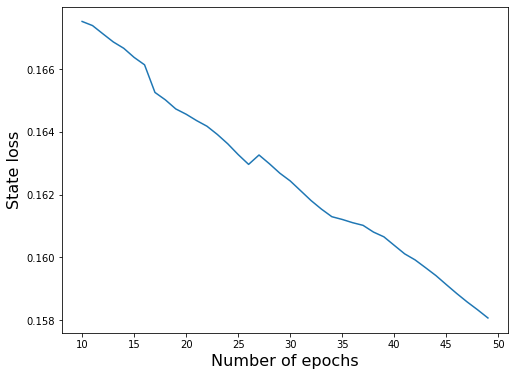

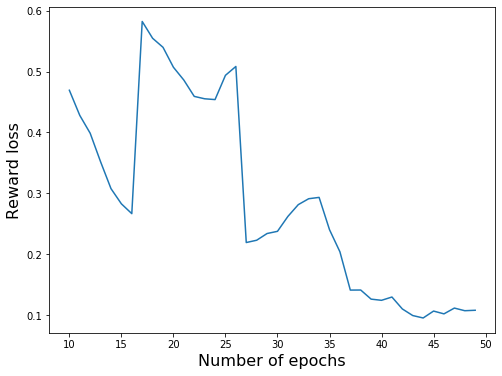

In [11]:
plot.plot_results(results, moving_average=True, average_window=10)